# SD212: Graph Learning
## Lab 4: Hierarchical Clustering

In this lab, you will learn to analyse the hierarchical structure of a graph. 

## Import

In [537]:
from IPython.display import SVG

In [538]:
import numpy as np
from scipy import sparse

In [539]:
from sknetwork.data import load_netset, karate_club
from sknetwork.hierarchy import LouvainIteration, Paris, cut_straight
from sknetwork.ranking import PageRank
from sknetwork.visualization import visualize_graph, visualize_dendrogram

## Data

We will work on the following graphs (see the [NetSet](https://netset.telecom-paristech.fr/) collection for details):
* Openflights (graph)
* WikiVitals (directed graph)

In [540]:
openflights = load_netset('openflights')
wikivitals = load_netset('wikivitals')

Parsing files...
Done.
Parsing files...
Done.


## 1. Graphs

## Karate Club


We first consider the [karate club graph](https://en.wikipedia.org/wiki/Zachary%27s_karate_club), a small graph with ground-truth clusters.

In [541]:
dataset = karate_club(True)

In [542]:
adjacency = dataset.adjacency
position = dataset.position
labels_true = dataset.labels

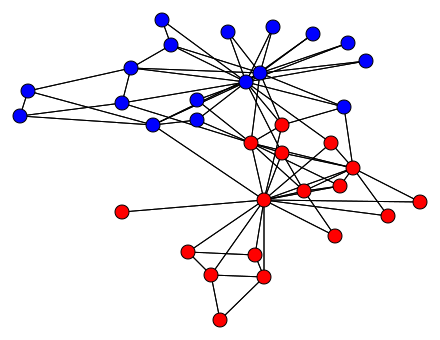

In [543]:
image = visualize_graph(adjacency, position, labels=labels_true)
SVG(image)

## To do

* Cluster the graph by the hierarchical Louvain algorithm (divisive algorithm, top-down).
* Display the dendrogram.
* How many clusters are there at depth 1?
* Display the graph with the corresponding clustering.
* How many clusters are there at depth 2?

In [544]:
louvain = LouvainIteration()

In [545]:
dendrogram = louvain.fit_predict(adjacency)

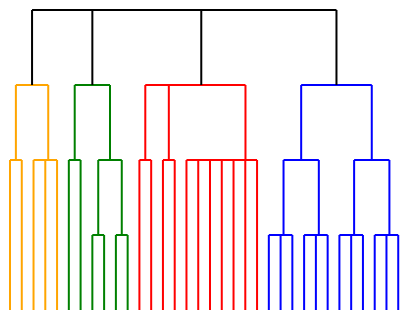

In [546]:
image = visualize_dendrogram(dendrogram)
SVG(image)

In [547]:
# find a clustering with n_clusters (at least n_clusters, if there is no cut with n_clusters)
#labels = cut_straight(dendrogram, n_clusters=2)

In [548]:
#len(set(labels))

4


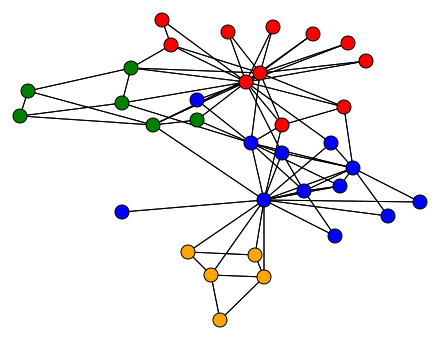

In [549]:
from sknetwork.hierarchy import cut_straight

# Number of clusters at depth 1
clusters_depth_1 = cut_straight(dendrogram, n_clusters=2)
print(len(set(clusters_depth_1)))
num_clusters_depth_1 = len(np.unique(clusters_depth_1))

# Visualize the graph with clusters at depth 1
image_depth_1 = visualize_graph(adjacency, position, labels=clusters_depth_1)
SVG(image_depth_1)


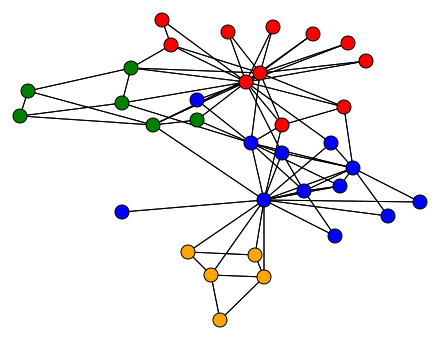

In [550]:
# Number of clusters at depth 2
clusters_depth_2 = cut_straight(dendrogram, n_clusters=4)
num_clusters_depth_2 = len(np.unique(clusters_depth_2))

# Visualize the graph with clusters at depth 2
image_depth_2 = visualize_graph(adjacency, position, labels=clusters_depth_2)
SVG(image_depth_2)


## To do

* Cluster the graph by the Paris algorithm.
* Display the dendrogram.
* Display the graph with the top-2 clusters. Compare this clustering to the ground-truth labels.
* Display the graph with the top-4 clusters. Compare this clustering with that given by Louvain (depth 1). 
* Display the corresponding aggregate dendrogram (check the parameters of the function ``cut_straight``).

In [551]:
paris = Paris()

In [552]:
dendrogram_paris = paris.fit_predict(adjacency)

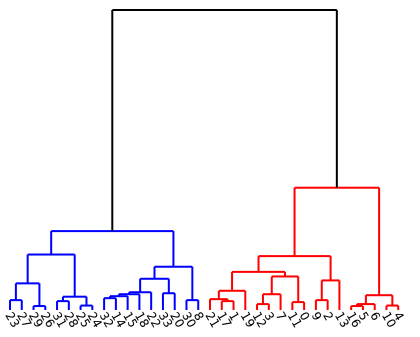

In [553]:
image = visualize_dendrogram(dendrogram_paris, names=np.arange(34))
SVG(image)

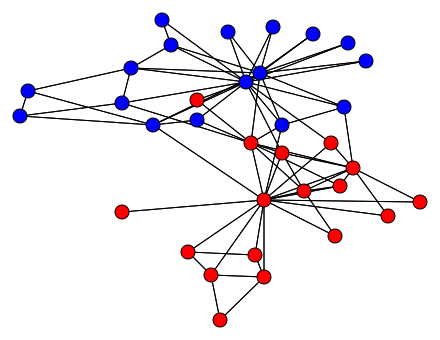

In [554]:
# Get top-2 clusters from Paris
clusters_top_2 = cut_straight(dendrogram_paris, n_clusters=2)

# Visualize the graph with top-2 clusters
image_top_2 = visualize_graph(adjacency, position, labels=clusters_top_2)
SVG(image_top_2)



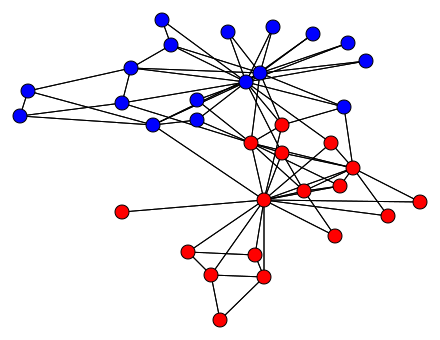

In [555]:
# Compare with ground-truth labels
image_true_labels = visualize_graph(adjacency, position, labels=labels_true)
SVG(image_true_labels)


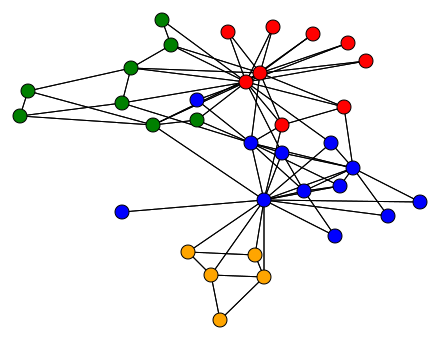

In [556]:
# Get top-4 clusters from Paris
clusters_top_4 = cut_straight(dendrogram_paris, n_clusters=4)

# Visualize the graph with top-4 clusters
image_top_4 = visualize_graph(adjacency, position, labels=clusters_top_4)
SVG(image_top_4)


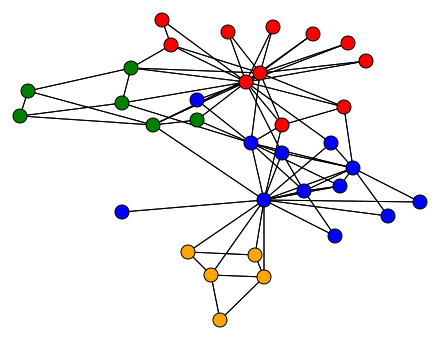

In [557]:
# Compare with Louvain clustering at depth 1
image_louvain_depth_1 = visualize_graph(adjacency, position, labels=clusters_depth_1)
SVG(image_louvain_depth_1)



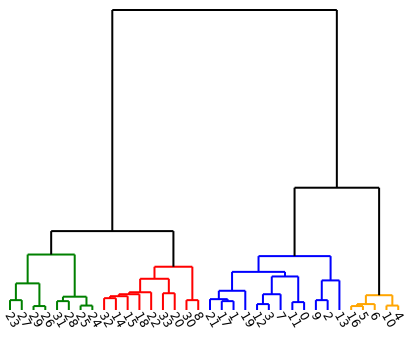

In [558]:
# Display the aggregate dendrogram
image_aggregate_dendrogram = visualize_dendrogram(dendrogram_paris, names=np.arange(adjacency.shape[0]), 
                                                  n_clusters=4)
SVG(image_aggregate_dendrogram)


In [559]:
# Output the number of clusters at depths 1 and 2 for Louvain
print(f"Number of clusters at depth 1 (Louvain): {num_clusters_depth_1}")
print(f"Number of clusters at depth 2 (Louvain): {num_clusters_depth_2}")

Number of clusters at depth 1 (Louvain): 4
Number of clusters at depth 2 (Louvain): 4


## Openflights


In [560]:
dataset = openflights

In [561]:
adjacency = dataset.adjacency
position = dataset.position
names = dataset.names

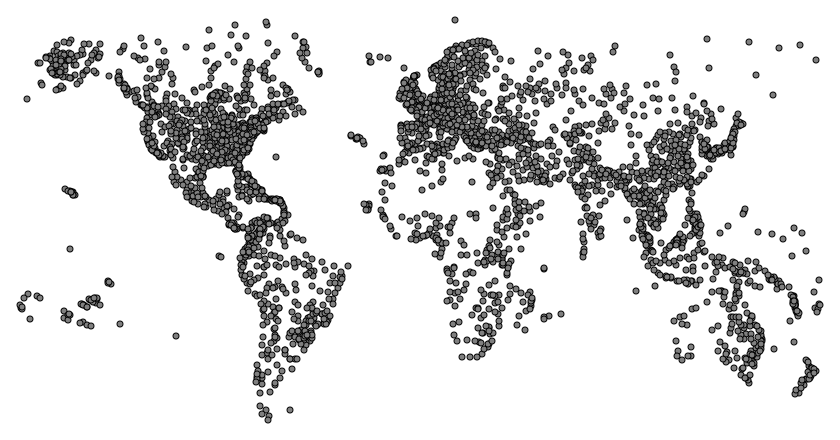

In [562]:
image = visualize_graph(adjacency, position, width=800, height=400, node_size=3, display_edges=False)
SVG(image)

## To do

* Display the same world map with the top-10 clusters found by Paris.<br>
Refer to the [tutorial on Louvain](https://scikitnetwork.readthedocs.io/en/latest/tutorials/clustering/louvain.html#) to display the aggregate graph.
* Display the aggregate dendrogram formed by the top-40 clusters found by Paris, with the name of the top airport  (in traffic) of each cluster. <br>Check the parameters of the function ``visualize_dendrogram`` for better visualization.

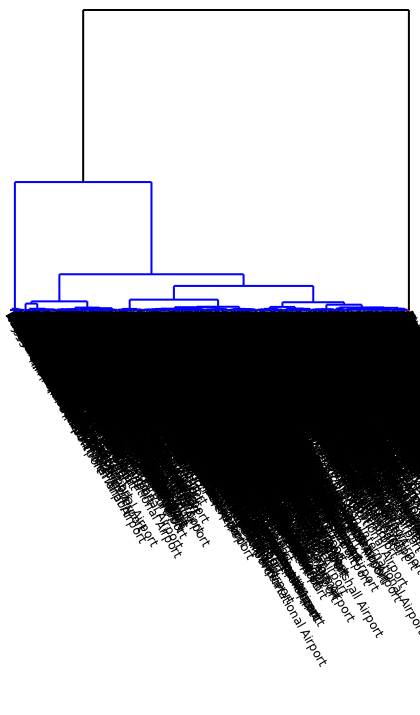

In [563]:
# Apply Paris algorithm
paris = Paris()
dendrogram = paris.fit_transform(adjacency)

# Visualize the dendrogram
image = visualize_dendrogram(dendrogram, names=names)
SVG(image)


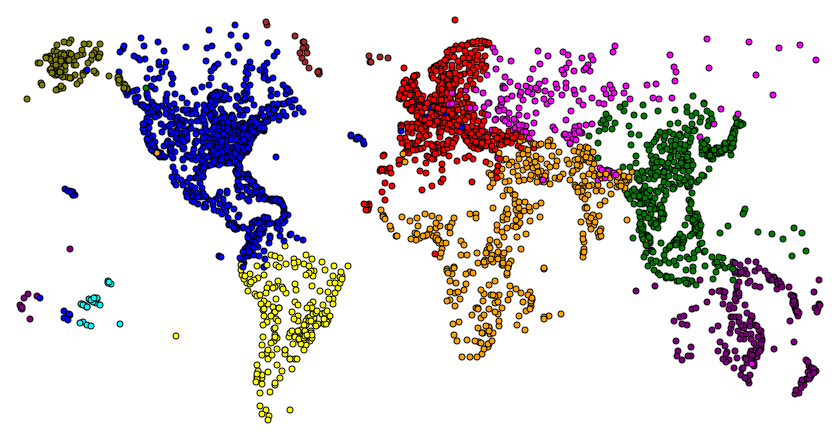

In [564]:
# Get top-10 clusters
clusters_top_10 = cut_straight(dendrogram, n_clusters=10)

# Visualize the graph with top-10 clusters
image_top_10 = visualize_graph(adjacency, position, labels=clusters_top_10, width=800, height=400, node_size=3, display_edges=False)
SVG(image_top_10)


In [565]:
from sknetwork.visualization import svg_dendrogram
# Get the top airport in each cluster (in terms of traffic)
pagerank = PageRank()
pagerank.fit(adjacency)
scores = pagerank.scores_

# Get top-40 clusters
clusters_top_40 = cut_straight(dendrogram, n_clusters=40)

top_airports = []
for cluster in np.unique(clusters_top_40):
    cluster_indices = np.where(clusters_top_40 == cluster)[0]
    top_index = cluster_indices[np.argmax(scores[cluster_indices])]
    top_airports.append(names[top_index])

# Aggregate the dendrogram
aggregate_dendrogram = paris.aggregate_

# Create a dictionary with the names of the top airports
names_top_airports = dict(enumerate(top_airports))

# Visualize the aggregate dendrogram with the names of the top airports
svg_aggregate_dendrogram = svg_dendrogram(aggregate_dendrogram, names=names_top_airports, n_clusters=40)
SVG(svg_aggregate_dendrogram)

AttributeError: 'Paris' object has no attribute 'aggregate_'

## 2. Directed graphs

## Wikipedia Vitals

In [ ]:
dataset = wikivitals

In [ ]:
adjacency = dataset.adjacency
names = dataset.names

## To do

* Cluster the graph by the Paris algorithm.
* Give the size and top-5 articles (in terms of Personalized PageRank) of each of the top-40 clusters found by Paris.
* Display the aggregate dendrogram formed by the top-40 clusters, with the name of the top article of each cluster.


In [ ]:
# Apply Paris algorithm
paris = Paris()
dendrogram = paris.fit_transform(adjacency)

# Get top-40 clusters
clusters_top_40 = cut_straight(dendrogram, n_clusters=40)

# Initialize PageRank
pagerank = PageRank()

# Store the size and top-5 articles for each cluster
cluster_info = []

for cluster in range(40):
    cluster_nodes = np.where(clusters_top_40 == cluster)[0]
    cluster_size = len(cluster_nodes)
    
    # Compute Personalized PageRank for nodes in the cluster
    personalization = np.zeros(adjacency.shape[0])
    personalization[cluster_nodes] = 1
    pagerank.fit(adjacency, personalization=personalization)
    scores = pagerank.scores_
    
    # Find top-5 articles in the cluster
    top_5_indices = cluster_nodes[np.argsort(scores[cluster_nodes])[-5:][::-1]]
    top_5_articles = [names[i] for i in top_5_indices]
    
    cluster_info.append((cluster_size, top_5_articles))

# Print the size and top-5 articles for each cluster
for i, (size, articles) in enumerate(cluster_info):
    print(f"Cluster {i+1} (Size: {size}): Top-5 Articles: {', '.join(articles)}")

TypeError: fit() got an unexpected keyword argument 'personalization'

In [ ]:
# Find the top article in each cluster for labeling the dendrogram
top_articles = []
for cluster in range(40):
    cluster_nodes = np.where(clusters_top_40 == cluster)[0]
    
    # Compute Personalized PageRank for nodes in the cluster
    scores = pagerank.fit_predict(adjacency, personalization=np.isin(np.arange(adjacency.shape[0]), cluster_nodes))
    
    # Find the top article in the cluster
    top_node = cluster_nodes[np.argmax(scores[cluster_nodes])]
    top_articles.append(names[top_node])

# Visualize the aggregate dendrogram with the names of the top articles
image_aggregate_dendrogram = visualize_dendrogram(dendrogram, names=top_articles, n_clusters=40)
SVG(image_aggregate_dendrogram)

TypeError: fit() got an unexpected keyword argument 'personalization'

## To do

* Complete the following function that returns the nested clusters from a target node in a dendrogram.
* Give the size and top-5 articles of each nested cluster from the article **Riverboat**.

In [ ]:
def get_nested_clusters(dendrogram: np.ndarray, node: int): 
    '''Get the nested clusters of a node, following the path from the corresponding leaf to the root in the dendrogram.
    
    Parameters
    ----------
    dendrogram: 
        Dendrogram
    node:
        Target node
        
    Returns
    -------
    cluster_nested: list of list
        Nested clusters, as a partition of the set of nodes 
        (the k-th nested cluster is the concatenation of the first k lists). 
        
    Example
    -------
    >>> dendrogram = np.array([[0, 1, 1, 2], [2, 3, 1, 2], [4, 5, 1, 4]])
    >>> get_nested_clusters(dendrogram, 0)
    [[0], [1], [2, 3]]
    '''
    n = dendrogram.shape[0] + 1
    
    cluster = {i: [i] for i in range(n)}
    nested_clusters = [[node]]
    cluster_index = node
    
    for t in range(n - 1):
        i = int(dendrogram[t][0])
        j = int(dendrogram[t][1])
        # to be completed
    
    return nested_clusters